<a href="https://colab.research.google.com/github/guilhermelaviola/ApplicationsOfDataScienceInDisruptiveTechnologies/blob/main/Class03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Boosting Algorithms**
Boosting algorithms are a family of ensemble learning techniques that sequentially combine multiple "weak learners" into a single "strong learner" to improve predictive accuracy. Instead of training a single powerful model, boosting trains a series of simple models, where each new model is specifically designed to correct the errors of its predecessors.

In [1]:
# Importing all the necessary libraries:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## **Boosting Algorithm initial example**

AdaBoost accuracy: 0.91
Gradient Boosting accuracy: 0.91


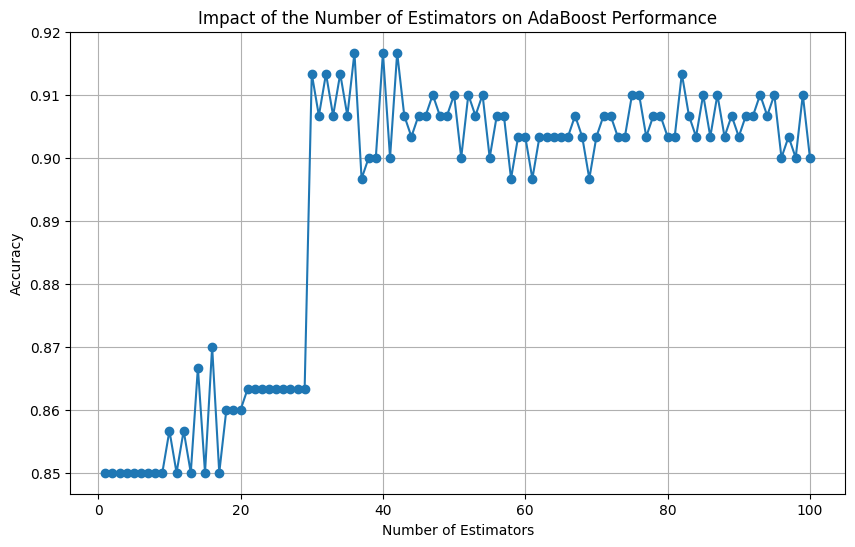

In [2]:
# Creating a synthetic dataset:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Dividing the dataset into training and test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the AdaBoost model:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Making predictions with AdaBoost:
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Training the Gradient Boosting model:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions with Gradient Boosting:
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Displaying the accuracies:
print(f'AdaBoost accuracy: {accuracy_ada:.2f}')
print(f'Gradient Boosting accuracy: {accuracy_gb:.2f}')

# Evaluating the impact of the number of estimators on AdaBoost performance:
estimators_range = range(1, 101)
accuracies = []

for n in estimators_range:
    ada_model = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the results:
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracies, marker='o')
plt.title('Impact of the Number of Estimators on AdaBoost Performance')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## **Optimization of Boosting Algorithm**

In [4]:
# Generating synthetic data:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Dividing the data into training and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the base model:
base_model = DecisionTreeClassifier(max_depth=1)

# Creating the AdaBoost clsssifier:
ada = AdaBoostClassifier(estimator=base_model, random_state=42)

# Defining the parameters for optimization:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Performing the search for the best parameters:
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Displaying the best parameters:
print(f'Best parameters: {grid_search.best_params_}')

# Training the model with the best parameters:
best_ada = grid_search.best_estimator_
best_ada.fit(X_train, y_train)

# Making predictions on the test set:
y_pred = best_ada.predict(X_test)

# Evaluating the accuracy:
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimized AdaBoost accuracy: {accuracy:.2f}')

Best parameters: {'learning_rate': 1, 'n_estimators': 200}
Optimized AdaBoost accuracy: 0.89
